In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Modelo de la señal
Se crea un modelo de una señal describiendola de forma recursiva, condicionado a que r(n) corresponde a ruido gaussiano. 

$$ x(n) =  0.6750 * x(n-1) - 0.8320 * x(n-2) + r(n) $$


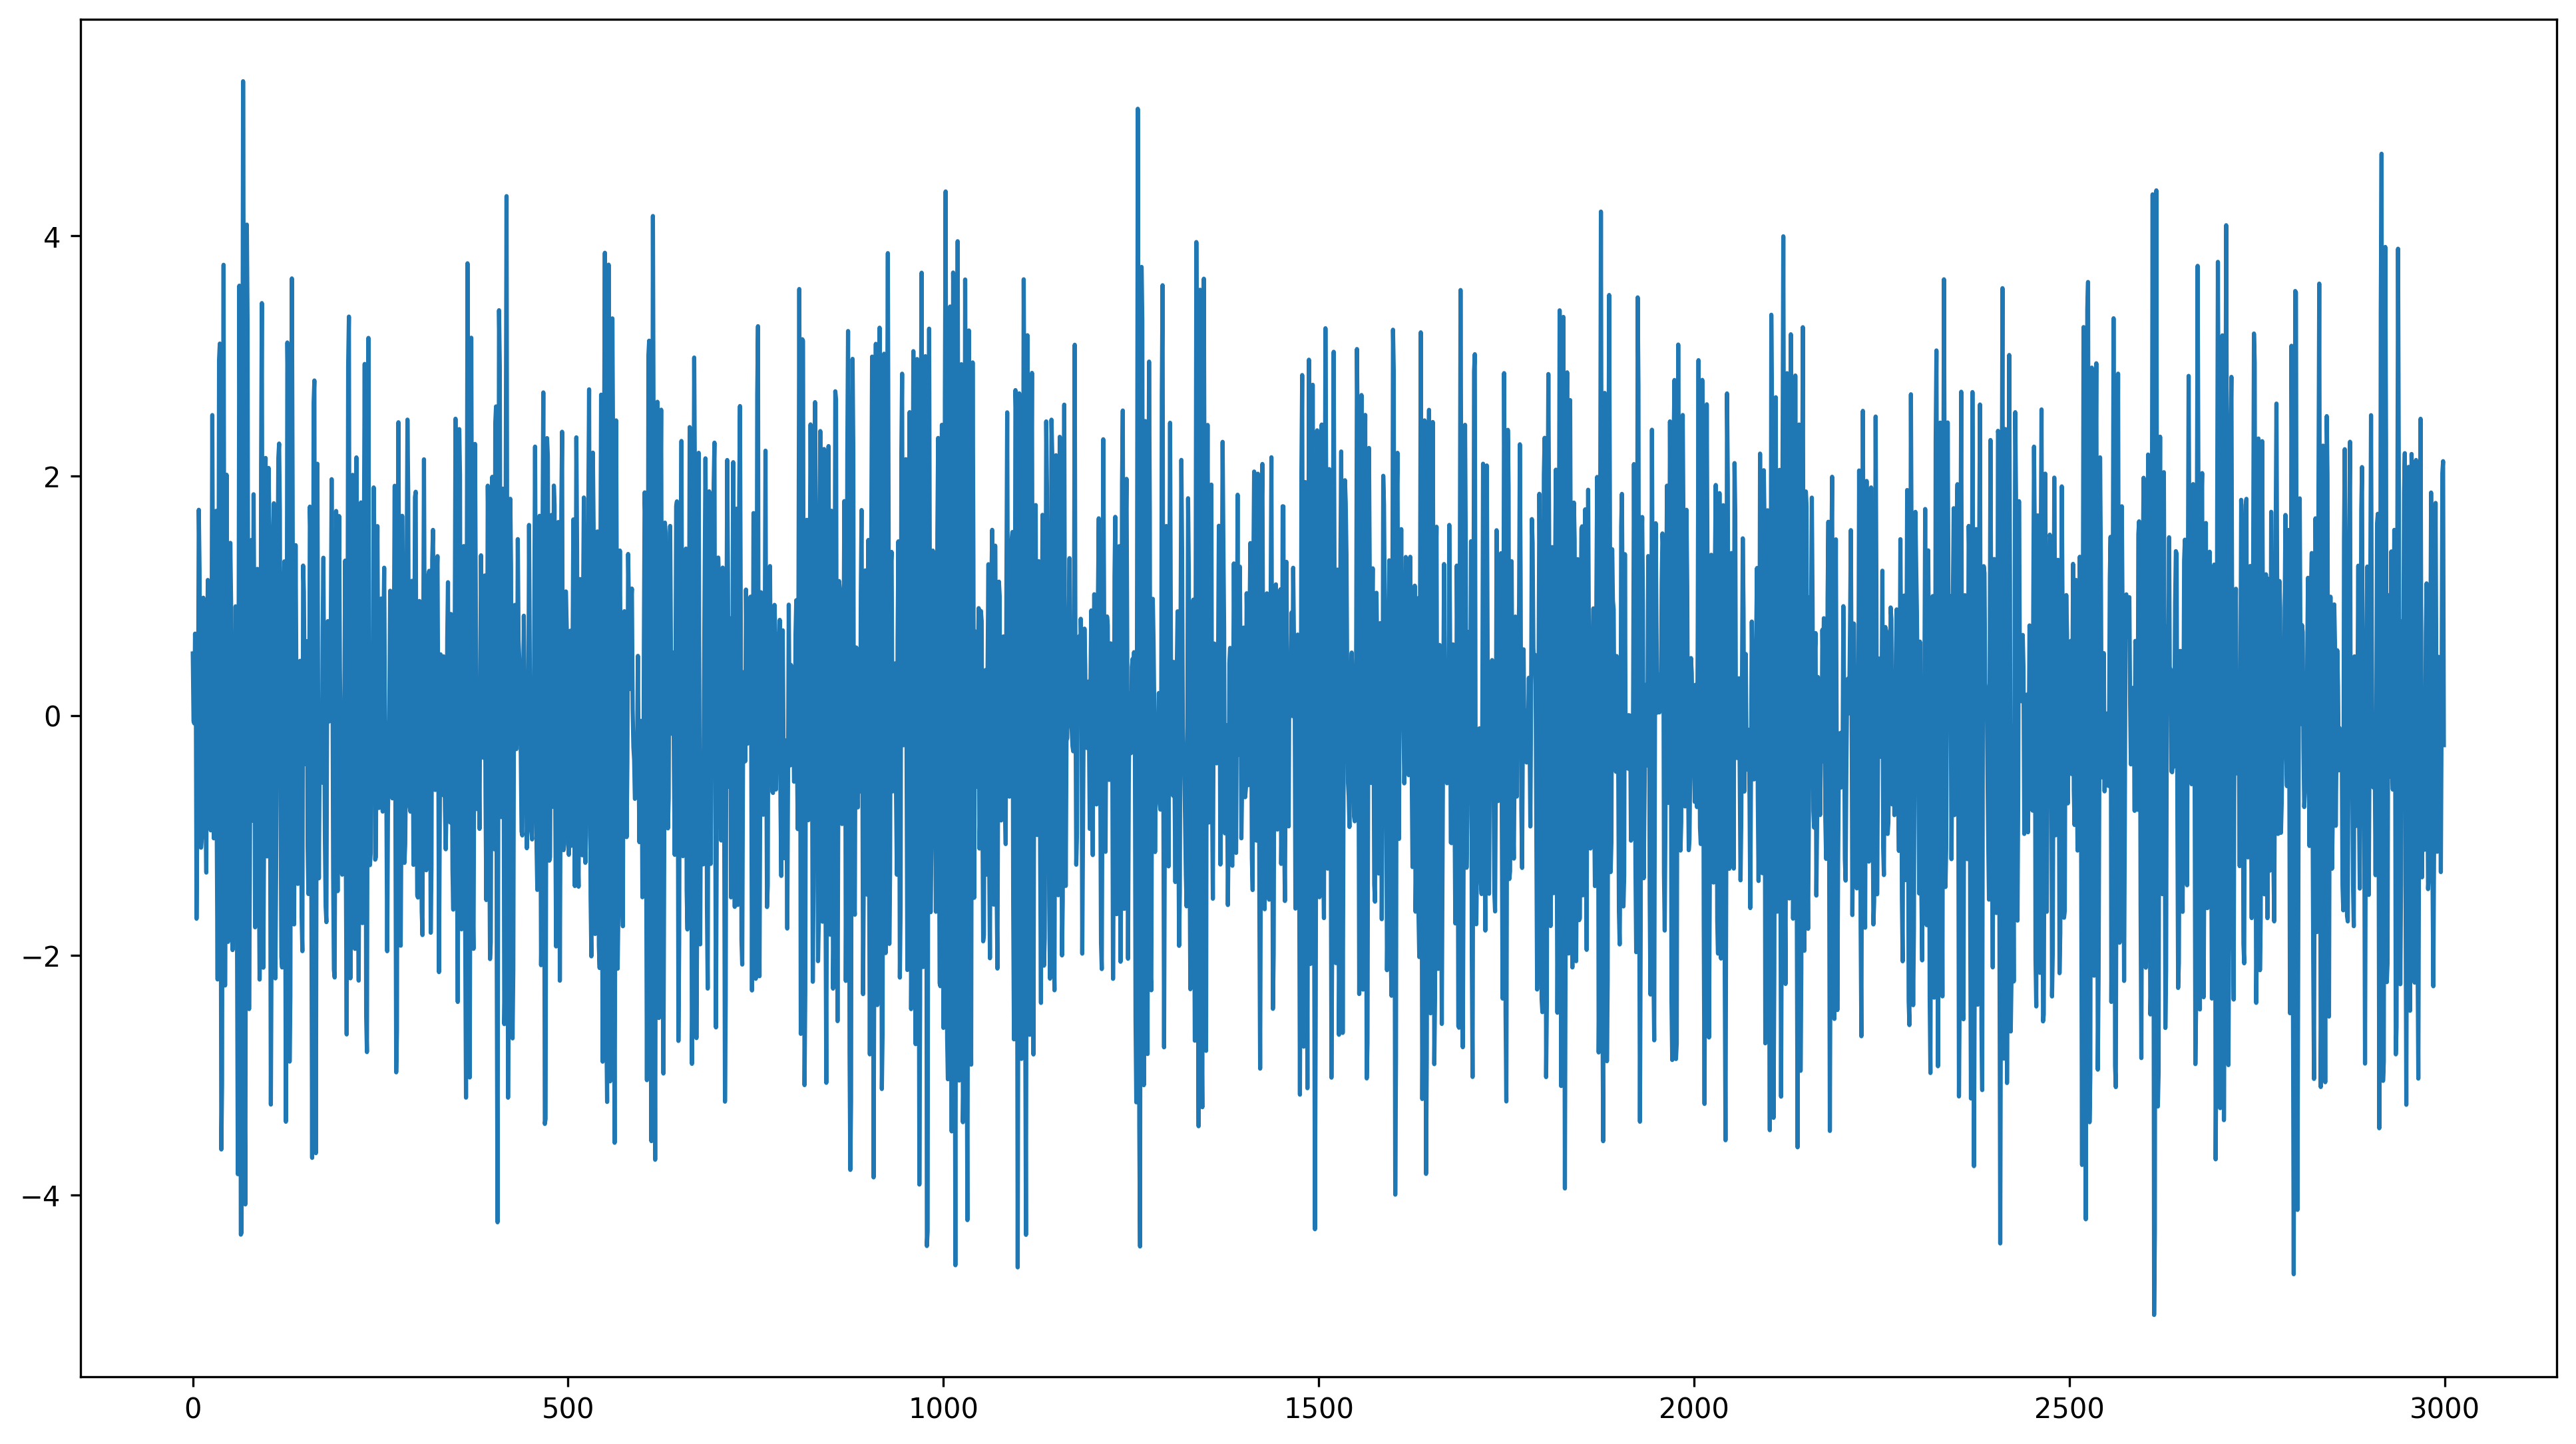

In [18]:
signal = np.zeros(3000) #Si es un escalar la entrada crea un vector
noise = 0.8 * np.random.randn(3000)#Tiene que ser distribución normal
signal[0] = noise[0]
signal[1] =  - 0.8320*signal[0] + noise[1]
for i in range(len(noise)-2):
    signal[i+2] =  0.6750*signal[i+1] - 0.8320*signal[i] + noise[i+2]

fig, ax = plt.subplots(figsize =(16, 9), dpi = 300)
ax.plot(signal)
plt.show()

In [88]:
class filtroLMS():
    
    def __init__(self, n, mu=0.02):
        self.n = n
        self.w = np.random.rand(n)
        self.mu = mu
    
    def train(self, signal):
        self.e = list()
        for i in range(len(signal)-self.n):
            sample = signal[i:i+self.n]
            error = signal[i+self.n] - np.dot(self.w, sample);
            self.w = self.w + self.mu * sample * error;
            self.e.append(error)
        
    def getCoeficients(self):
        return self.w 

Si el receptor desea recuperar los coeficientes que modelan a la señal recibida sería suficiente conocer el número de coeficeintes del modelo y obtener las aproximaciones utilizando filtros adaptativos.

Algunas aplicaciones interesantes puede ser el envío de información oculta dentro de una señal en apariencia aleatoria. 

In [91]:
fi_LMS = filtroLMS(2,0.0015)
fi_LMS.train(signal)
w_fi = fi_LMS.getCoeficients()
print("x(n) = "+str(w_fi[1])+" x(n−1)  "+ str(w_fi[0]) +" x(n−2)")

x(n) = 0.6871880912489998 x(n−1)  -0.8237694135095394 x(n−2)


## Neural Network version

In [17]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#### Selección de datos de entrada y salida 

In [79]:
x = np.array([signal[i:i+2] for i in range(len(signal)-2)])
y = np.array(signal[2:])

x_train_full, x_test, y_train_full, y_test = train_test_split(x,y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full,y_train_full)

#### Definición del modelo

In [81]:
model_LMS = keras.models.Sequential()
model_LMS.add(keras.layers.Dense(1, input_shape=x_train.shape[1:]))
model_LMS.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [77]:
model_LMS.compile(loss="mean_squared_error",
              optimizer="sgd")

In [75]:
history = model_LMS.fit(x_train, y_train, epochs=5,
                    validation_data=(x_valid, y_valid))

Epoch 1/5
53/53 [==============================] - 0s 2ms/step - loss: 2.1685 - accuracy: 0.0000e+00 - val_loss: 0.8655 - val_accuracy: 0.0000e+00
Epoch 2/5
53/53 [==============================] - 0s 784us/step - loss: 0.6859 - accuracy: 0.0000e+00 - val_loss: 0.6863 - val_accuracy: 0.0000e+00
Epoch 3/5
53/53 [==============================] - 0s 772us/step - loss: 0.6432 - accuracy: 0.0000e+00 - val_loss: 0.6750 - val_accuracy: 0.0000e+00
Epoch 4/5
53/53 [==============================] - 0s 811us/step - loss: 0.6422 - accuracy: 0.0000e+00 - val_loss: 0.6738 - val_accuracy: 0.0000e+00
Epoch 5/5
53/53 [==============================] - 0s 825us/step - loss: 0.6421 - accuracy: 0.0000e+00 - val_loss: 0.6749 - val_accuracy: 0.0000e+00


In [94]:
w = layer.get_weights()[0]
print("x(n) = "+str(w[1])+" x(n−1)  "+ str(w[0]) +" x(n−2)")

x(n) = [0.6789117] x(n−1)  [-0.82433856] x(n−2)
